Initial exploration of 311 data

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
# import matplotlib as mpl
import seaborn as sns

/Users/mmolli/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Download data

https://data.sfgov.org/City-Infrastructure/Case-Data-from-San-Francisco-311-SF311-/vw6y-z8j6 (export csv)

## And rename with timestamp

```bash
$ mv Case_Data_from_San_Francisco_311__SF311.csv Case_Data_from_San_Francisco_311__SF311_2016-02-10.csv
```

In [4]:
df = pd.read_csv('~/data/311/Case_Data_from_San_Francisco_311__SF311_2016-02-10.csv', header=0, index_col=0, parse_dates=[1, 2, 3])

/Users/mmolli/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [56]:
print(df['Opened'].min())
print(df['Opened'].max())

2008-03-20 11:48:32
2016-02-10 00:47:01


In [5]:
df.shape

(1553412, 15)

In [6]:
df[(df['Opened'] > '2014-01-01') & (df['Opened'] < '2016-01-01')].shape

(603654, 15)

In [7]:
df[(df['Source'] == 'Voice In') & (df['Neighborhood'] == 'Chinatown')].head(20)

,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
CaseID,,,,,,,,,,,,,,,
5553343,2016-02-09 23:14:34,NaT,2016-02-09 23:18:25,Open,Open,Housing Authority SR Queue,SFHA Requests,SFHA Priority - Emergency,Plumbers,"711 PACIFIC AVE, Apt 312, SAN FRANCISCO, CA, 9...",3,Chinatown,"(37.796705726767, -122.407614465052)",Voice In,NaN
5552524,2016-02-09 16:21:23,NaT,2016-02-09 16:29:05,Open,Open,SFMTA - Temporary Sign Request Queue,Temporary Sign Request,Temporary Sign Request for Corporate_Events,160 ft zone requested from 02/20/2016 to 02/20...,"659 PINE ST, SAN FRANCISCO, CA, 94108",3,Chinatown,"(37.791116559307, -122.406466815433)",Voice In,NaN
5551996,2016-02-09 14:40:27,NaT,2016-02-09 14:45:04,Open,Open,DPT Meter_Bike Queue,Damaged Property,Damaged Parking_Meter,Parking_Meter,Intersection of CLAY ST and STOCKTON ST,3,Chinatown,"(37.7940603549851, -122.407903381766)",Voice In,http://mobile311.sfgov.org/media/san_francisco...
5549116,2016-02-08 20:01:14,NaT,2016-02-08 20:01:45,Open,open,PUC Streetlights Queue,Streetlights,Streetlight - Light_Burnt_Out,Light_Burnt_Out on Metal Pole,Intersection of JACKSON ST and COLUMBUS AVE,3,Chinatown,"(37.7963019491983, -122.404412084402)",Voice In,NaN
5547822,2016-02-08 14:40:09,NaT,2016-02-08 14:42:52,Open,accepted,DPW Ops Queue,Litter Receptacles,Other_garbage_can_repair,NaN,Intersection of GRANT AVE and PACIFIC AVE,3,Chinatown,"(37.7969018389449, -122.406827805934)",Voice In,http://mobile311.sfgov.org/media/san_francisco...
5547249,2016-02-08 12:51:55,2016-02-08 14:29:48,2016-02-08 14:29:48,Closed,Case Completed - resolved: Pickup completed.,Recology_Abandoned,Street and Sidewalk Cleaning,Garbage_and_Debris,Furniture,Intersection of COMMERCIAL ST and GRANT AVE,3,Chinatown,"(37.7938318376716, -122.406220390531)",Voice In,NaN
5544195,2016-02-07 13:22:06,NaT,2016-02-07 13:22:37,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Garbage_and_Debris,Other_loose_garbage_debris_yard_waste,Intersection of WAVERLY PL and SACRAMENTO ST,3,Chinatown,"(37.7933149015301, -122.406643271864)",Voice In,NaN
5543866,2016-02-07 11:17:23,NaT,2016-02-07 11:19:36,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Garbage_and_Debris,Oil_paint_other_liquid_spill_wet,"825 CLAY ST, SAN FRANCISCO, CA, 94108",3,Chinatown,"(37.794054132511, -122.406656545076)",Voice In,NaN
5543491,2016-02-07 08:48:23,NaT,2016-02-07 08:48:56,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Garbage_and_Debris,Other_loose_garbage_debris_yard_waste,Intersection of VINTON CT and GRANT AVE,3,Chinatown,"(37.7917781886126, -122.405799719185)",Voice In,NaN


In [11]:
# prediction of supervisor queue getting transferred - do we have transfer information?
df['Responsible Agency'].value_counts().head(10)

DPW Ops Queue                        692444
Recology_Abandoned                   135812
DPT Abandoned Vehicles Work Queue    116013
DPW BSM Queue                         75079
DPT Meter_Bike Queue                  58688
PUC Sewer Ops                         50649
311 HA SR Queue                       36079
Housing Authority SR Queue            26125
PG and E - Streetlights Queue         24463
DPW BSSR Queue                        23718
Name: Responsible Agency, dtype: int64

In [23]:
df['Request Type'].value_counts().head(20)

Sidewalk_Cleaning                             171729
General Cleaning                              115428
Bulky Items                                   107029
Not_Offensive Graffiti on Private Property     87481
Offensive Graffiti on Public Property          86709
Not_Offensive Graffiti on Public Property      63411
Damaged Parking_Meter                          49640
Hazardous Materials                            48408
Illegal_Dumping                                44608
Abandoned Vehicle - Car4door                   37618
SFHA Priority - Urgent                         31780
Pavement_Defect                                29604
Streetlight - Light_Burnt_Out                  27355
Sewage_back_up                                 26760
Offensive Graffiti on Private Property         24208
Abandoned Vehicle - Other                      23682
Abandoned Vehicle - Car2door                   18207
Street_Cleaning                                17528
Sidewalk_Defect                               

In [24]:
print(df['Category'].nunique())
print(df['Category'].value_counts())

28
Street and Sidewalk Cleaning    543001
Graffiti Public Property        150129
Graffiti Private Property       116657
Abandoned Vehicle               115430
General Requests                 95772
Damaged Property                 66222
SFHA Requests                    62212
Sewer Issues                     53188
Streetlights                     43934
Tree Maintenance                 40555
Street Defects                   34080
Litter Receptacles               33610
Illegal Postings                 31469
Sign Repair                      28864
Rec and Park Requests            27016
Sidewalk or Curb                 24638
MUNI Feedback                    22731
Temporary Sign Request           17120
311 External Request             16643
Blocked Street or SideWalk       12362
Residential Building Request      6958
Catch Basin Maintenance           4666
Color Curb                        3312
Interdepartmental Request         1052
Noise Report                       998
Unpermitted Cab Compla

In [25]:
df['Opened_ymd'] = df['Opened'].map(lambda x: x.strftime('%Y-%m-%d'))

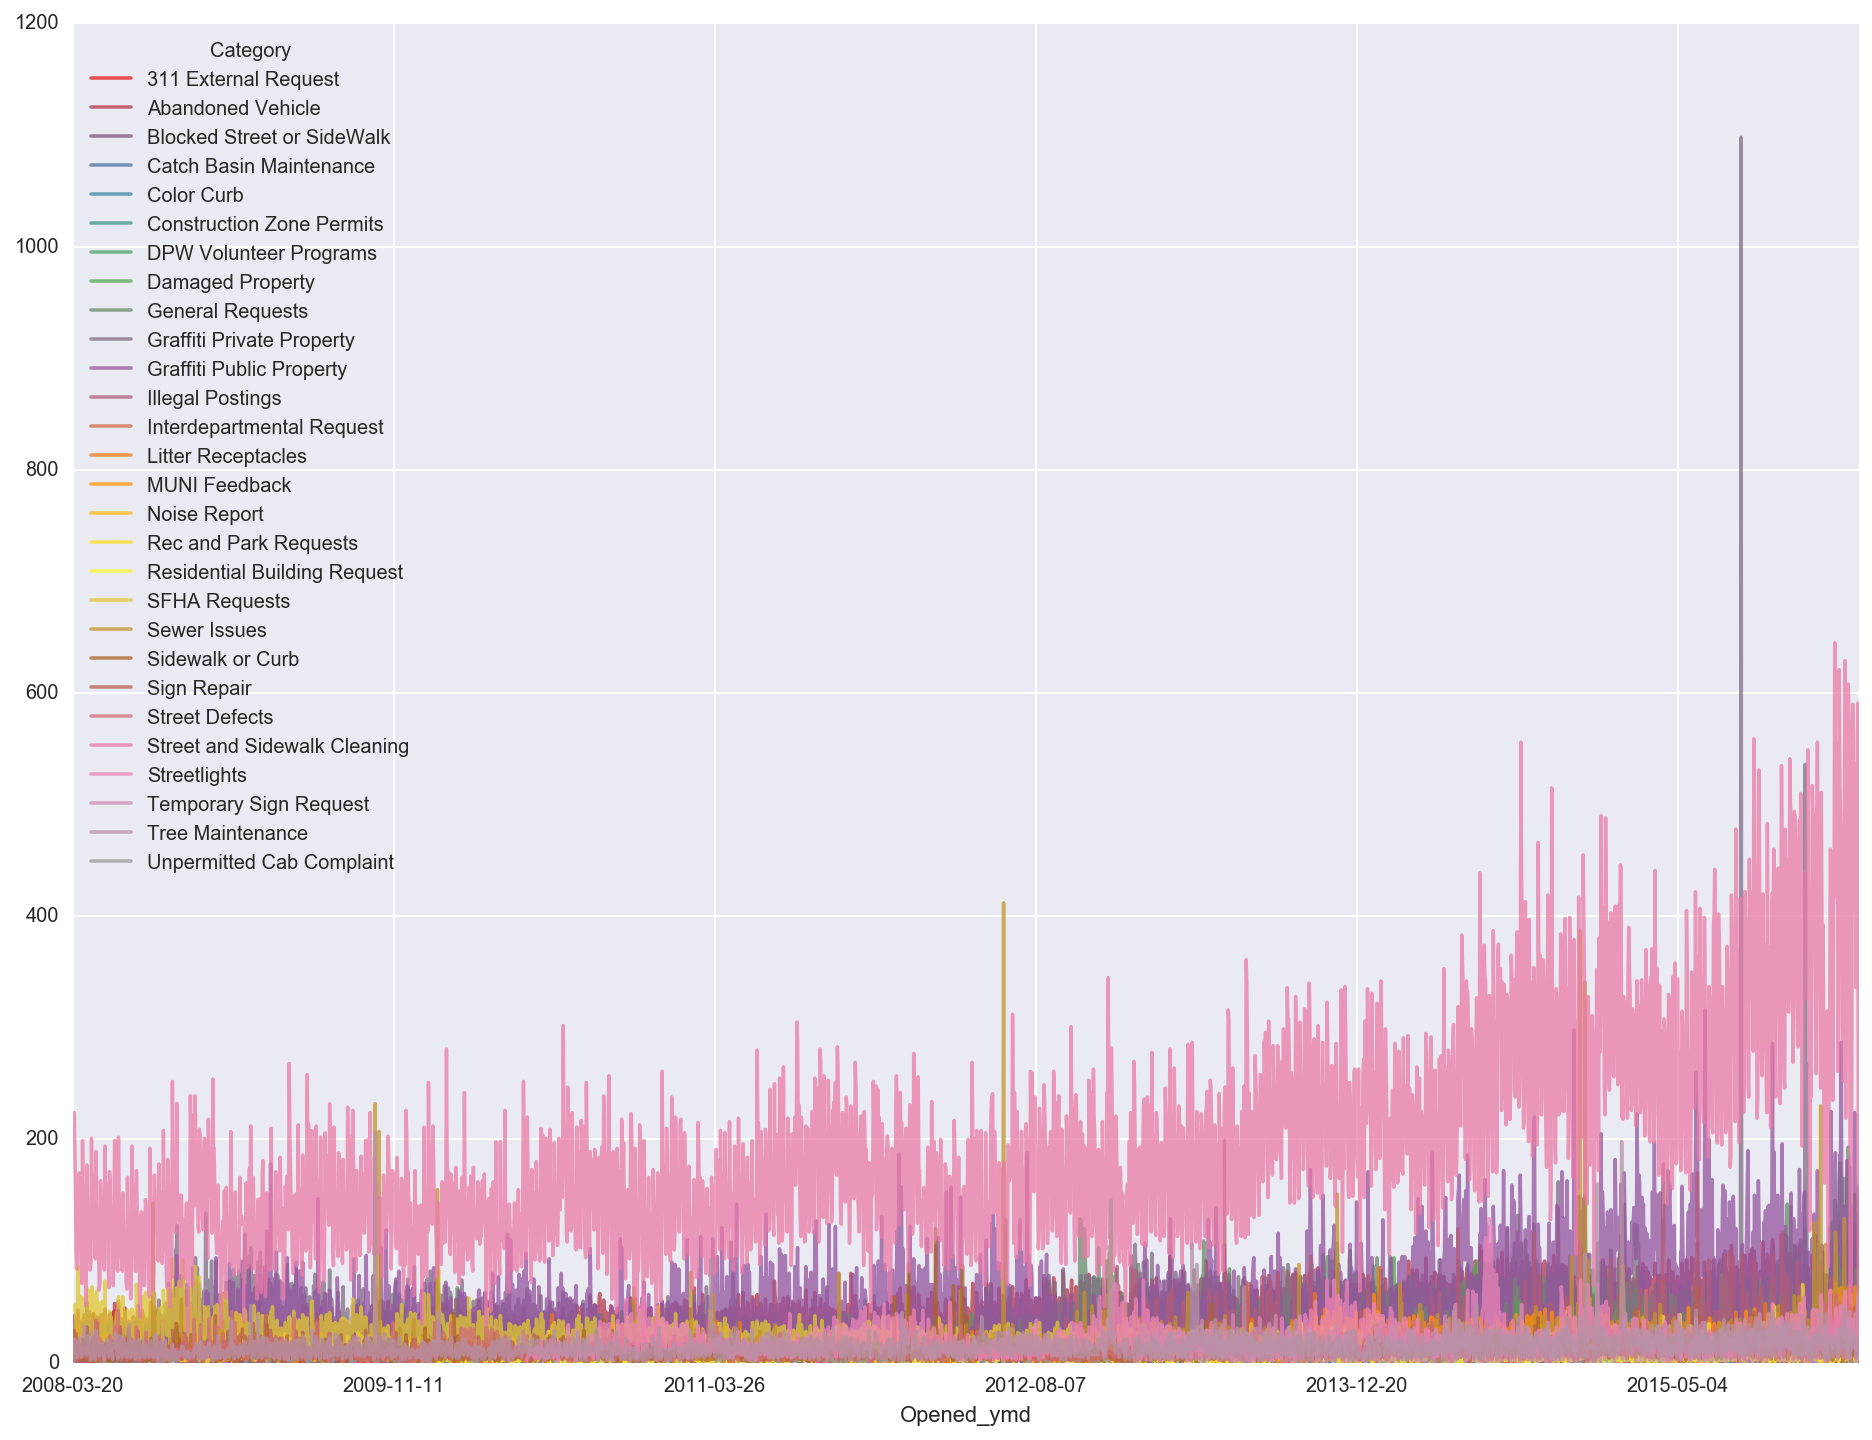

In [26]:
fix, ax = plt.subplots(figsize=(16, 12))
colormap='Set1'
df.groupby(by=['Opened_ymd', 'Category'])['Opened'].count().unstack().plot(ax=ax, colormap=colormap, alpha=.75)

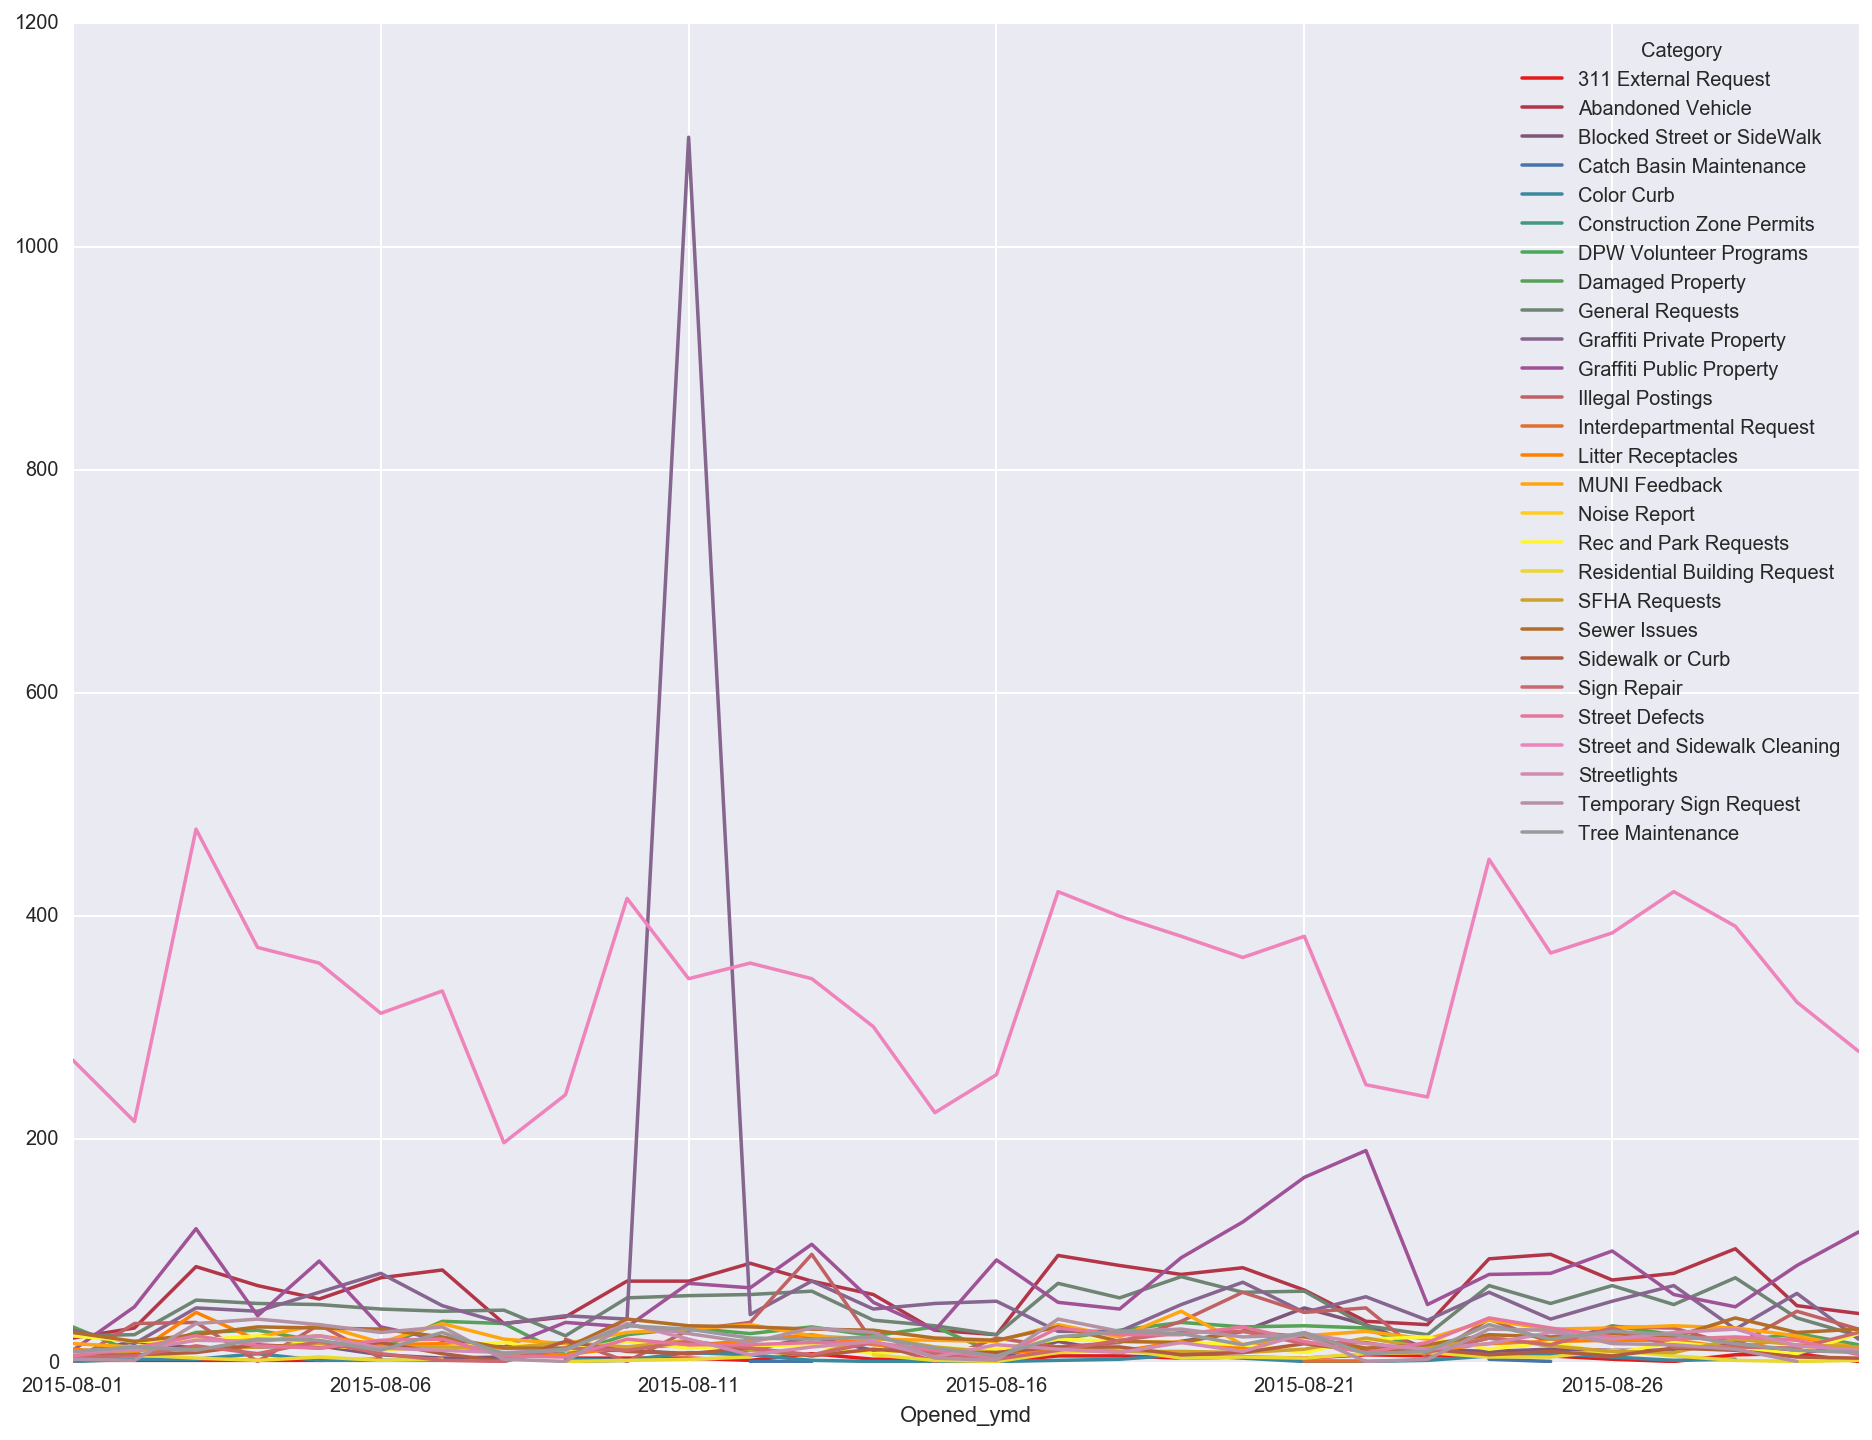

In [27]:
fix, ax = plt.subplots(figsize=(16, 12))
colormap='Set1'
df[(df['Opened'] > '2015-08-01') & (df['Opened'] < '2015-08-31')].groupby(by=['Opened_ymd', 'Category'])['Opened'].count().unstack().plot(ax=ax, colormap=colormap)

In [11]:
df[(df['Category'] == 'Street and Sidewalk Cleaning')]['Neighborhood'].value_counts().head(10)

Mission                  74342
South of Market          48677
Downtown/Civic Center    28013
Bayview                  23193
Tenderloin               20211
Western Addition         19882
Excelsior                16605
Bernal Heights           14796
Nob Hill                 14766
Outer Sunset             13808
Name: Neighborhood, dtype: int64

In [12]:
df[(df['Category'] == 'Noise Report')]['Neighborhood'].value_counts().head(10)

South of Market    93
Mission            91
Outer Sunset       56
Civic Center       48
Lower Nob Hill     40
Noe Valley         28
Mission Dolores    27
Inner Richmond     21
Pacific Heights    21
Marina             19
Name: Neighborhood, dtype: int64

In [13]:
df[(df['Opened_ymd'] == '2015-08-11')]['Category'].value_counts().head(10)

Graffiti Private Property       1098
Street and Sidewalk Cleaning     344
Abandoned Vehicle                 73
Graffiti Public Property          71
General Requests                  60
Sewer Issues                      33
Damaged Property                  31
MUNI Feedback                     30
Tree Maintenance                  30
Illegal Postings                  29
Name: Category, dtype: int64

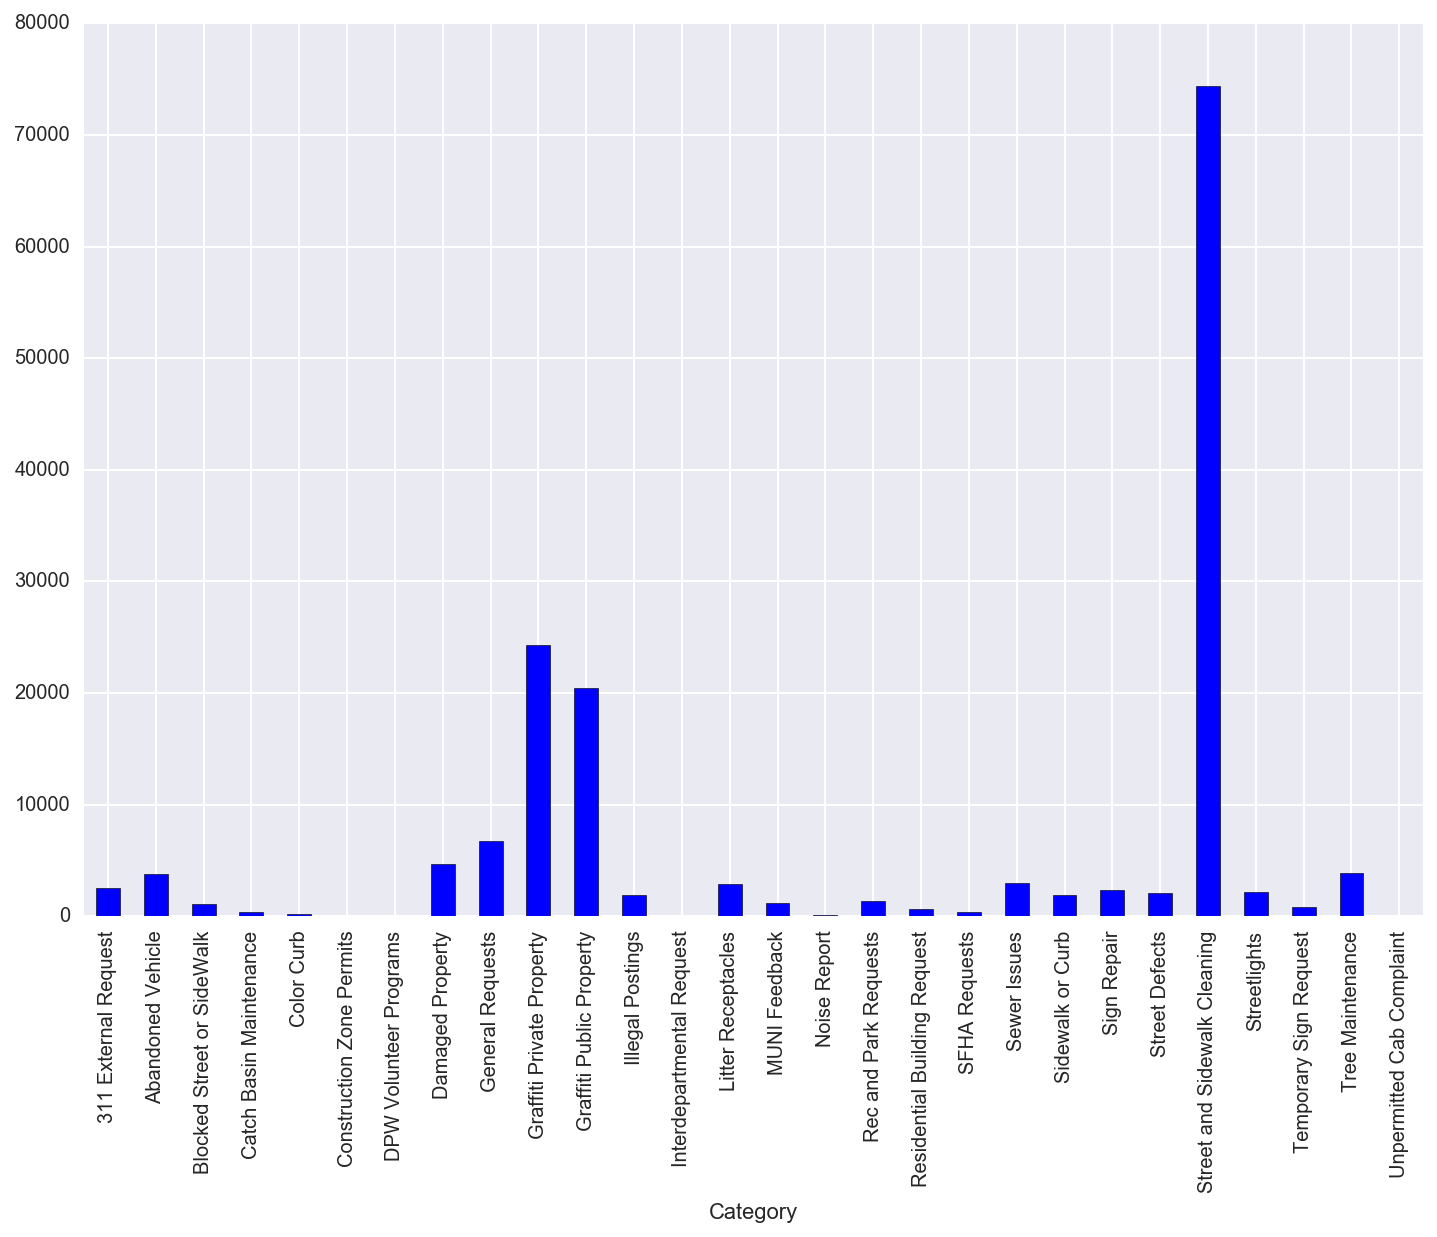

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
df.groupby(by=['Category', 'Neighborhood'])['Opened'].count().unstack()['Mission'].T.plot(ax=ax, kind='bar')

In [28]:
category = [
    '311 External Request',
    'Abandoned Vehicle',
    'Blocked Street or SideWalk',
    'Catch Basin Maintenance',
    'Color Curb',
#     'Construction Zone Permits',
#     'DPW Volunteer Programs',
    'Damaged Property',
    'General Requests',
    'Graffiti Private Property',
    'Graffiti Public Property',
    'Illegal Postings',
    'Interdepartmental Request',
    'Litter Receptacles',
    'MUNI Feedback',
    'Noise Report',
    'Rec and Park Requests',
    'Residential Building Request',
    'SFHA Requests',
    'Sewer Issues',
    'Sidewalk or Curb',
    'Sign Repair',
    'Street Defects',
    'Street and Sidewalk Cleaning',
    'Streetlights',
    'Temporary Sign Request',
    'Tree Maintenance',
#     'Unpermitted Cab Complaint',
]

In [29]:
neighbs = [
    'Alamo Square',
#     'Anza Vista',
#     'Apparel City',
#     'Aquatic Park / Ft. Mason',
#     'Ashbury Heights',
#     'Balboa Terrace',
    'Bayview',
    'Bernal Heights',
#     'Bret Harte',
#     'Buena Vista',
#     'Candlestick Point SRA',
    'Castro',
#     'Castro/Upper Market',
    'Cathedral Hill',
#     'Cayuga',
#     'Central Waterfront',
    'Chinatown',
    'Civic Center',
#     'Clarendon Heights',
#     'Cole Valley',
#     'Corona Heights',
    'Cow Hollow',
#     'Crocker Amazon',
#     'Diamond Heights',
    'Dogpatch',
    'Dolores Heights',
    'Downtown / Union Square',
#     'Downtown/Civic Center',
    'Duboce Triangle',
#     'Eureka Valley',
#     'Excelsior',
#     'Fairmount',
    'Financial District',
    "Fisherman's Wharf",
#     'Forest Hill',
#     'Forest Knolls',
    'Glen Park',
    'Golden Gate Heights',
#     'Golden Gate Park',
    'Haight Ashbury',
    'Hayes Valley',
#     'Holly Park',
#     'Hunters Point',
#     'India Basin',
#     'Ingleside',
#     'Ingleside Terraces',
    'Inner Richmond',
    'Inner Sunset',
    'Japantown',
#     'Laguna Honda',
#     'Lake Street',
#     'Lakeshore',
#     'Laurel Heights / Jordan Park',
#     'Lincoln Park / Ft. Miley',
#     'Little Hollywood',
#     'Lone Mountain',
    'Lower Haight',
    'Lower Nob Hill',
    'Lower Pacific Heights',
    'Marina',
#     'McLaren Park',
#     'Merced Heights',
#     'Merced Manor',
#     'Midtown Terrace',
#     'Mint Hill',
#     'Miraloma Park',
    'Mission',
    'Mission Bay',
    'Mission Dolores',
    'Mission Terrace',
#     'Monterey Heights',
#     'Mt. Davidson Manor',
    'Nob Hill',
    'Noe Valley',
    'North Beach',
#     'Northern Waterfront',
#     'Ocean View',
    'Oceanview',
    'Outer Mission',
    'Outer Richmond',
    'Outer Sunset',
    'Pacific Heights',
    'Panhandle',
#     'Parkmerced',
#     'Parkside',
#     'Parnassus Heights',
#     'Peralta Heights',
    'Polk Gulch',
#     'Portola',
    'Potrero Hill',
    'Presidio Heights',
#     'Presidio National Park',
#     'Presidio Terrace',
#     'Produce Market',
#     'Rincon Hill',
    'Russian Hill',
#     'Seacliff',
#     'Sherwood Forest',
#     'Showplace Square',
#     'Silver Terrace',
#     'South Beach',
    'South of Market',
#     'St. Francis Wood',
#     "St. Mary's Park",
#     'Stonestown',
#     'Sunnydale',
#     'Sunnyside',
    'Sutro Heights',
    'Telegraph Hill',
    'Tenderloin',
#     'Treasure Island',
#     'Treasure Island/YBI',
#     'Twin Peaks',
#     'Union Street',
#     'University Mound',
    'Upper Market',
#     'Visitacion Valley',
#     'West Portal',
#     'West of Twin Peaks',
    'Western Addition',
#     'Westwood Highlands',
#     'Westwood Park',
#     'Yerba Buena Island',
]

# Look at only 2015

In [30]:
df_yr = df[(df['Opened'] >= '2015-01-01') &
           (df['Opened'] < '2016-01-01') &
           df['Neighborhood'].apply(lambda x: x in neighbs) & 
           df['Category'].apply(lambda x: x in category)
          ]

In [131]:
df_yr.shape

(230406, 18)

In [31]:
df_yr.groupby(by=['Category', 'Neighborhood'])['Opened'].count().unstack()

Neighborhood,Alamo Square,Bayview,Bernal Heights,Castro,Cathedral Hill,Chinatown,Civic Center,Cow Hollow,Dogpatch,Dolores Heights,Downtown / Union Square,Duboce Triangle,Financial District,Fisherman's Wharf,Glen Park,Golden Gate Heights,Haight Ashbury,Hayes Valley,Inner Richmond,Inner Sunset,Japantown,Lower Haight,Lower Nob Hill,Lower Pacific Heights,Marina,Mission,Mission Bay,Mission Dolores,Mission Terrace,Nob Hill,Noe Valley,North Beach,Oceanview,Outer Mission,Outer Richmond,Outer Sunset,Pacific Heights,Panhandle,Polk Gulch,Potrero Hill,Presidio Heights,Russian Hill,South of Market,Sutro Heights,Telegraph Hill,Tenderloin,Upper Market,Western Addition
Category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
311 External Request,3,4,23,5,8,9,24,1,6,6,24,4,24,2,5,6,6,8,36,15,5,10,46,9,9,82,3,45,22,26,8,9,4,5,39,64,13,6,7,35,2,14,48,4,2,35,7,13
Abandoned Vehicle,15,499,2119,29,25,19,13,38,45,118,2,35,12,6,95,572,69,50,512,244,32,45,93,31,105,489,38,45,342,185,557,143,303,122,1044,1844,184,51,40,252,52,556,231,246,71,27,339,59
Blocked Street or SideWalk,10,33,62,65,36,42,110,11,17,27,50,64,70,6,17,22,68,87,47,48,28,68,110,65,51,340,26,70,21,43,74,38,19,19,48,77,103,28,36,69,37,57,399,4,16,66,4,62
Catch Basin Maintenance,2,5,8,NaN,2,4,2,1,1,2,1,4,7,1,9,3,4,1,11,3,4,NaN,6,3,7,16,NaN,7,5,NaN,5,6,NaN,2,10,11,9,3,1,6,4,7,28,NaN,2,5,1,2
Color Curb,3,10,45,9,3,NaN,3,9,5,31,2,5,3,NaN,5,7,15,8,35,23,7,15,7,10,29,33,3,24,25,6,46,9,9,3,33,29,54,6,5,27,15,6,34,NaN,7,6,9,11
Damaged Property,34,66,136,80,162,209,559,23,36,32,287,66,368,208,21,20,170,58,305,154,100,87,425,135,191,999,170,122,53,101,62,311,11,28,224,265,158,55,232,43,50,68,1361,5,17,662,12,77
General Requests,71,303,396,309,184,172,474,50,122,195,286,252,354,56,85,146,178,174,403,223,55,199,350,135,221,1141,113,382,264,271,311,275,133,116,386,657,425,157,181,363,109,275,1336,57,60,464,89,213
Graffiti Private Property,153,124,142,148,152,1127,714,20,45,63,223,372,104,22,38,31,684,281,590,147,61,543,731,140,57,3340,15,817,216,234,51,327,51,83,305,378,96,259,164,406,6,102,2208,37,20,1169,26,281
Graffiti Public Property,272,222,371,233,332,233,910,58,173,292,275,1125,412,30,82,76,824,653,1003,530,190,1056,705,614,239,6514,39,1622,221,333,104,299,44,36,647,700,425,726,232,771,83,240,1505,101,32,748,175,746


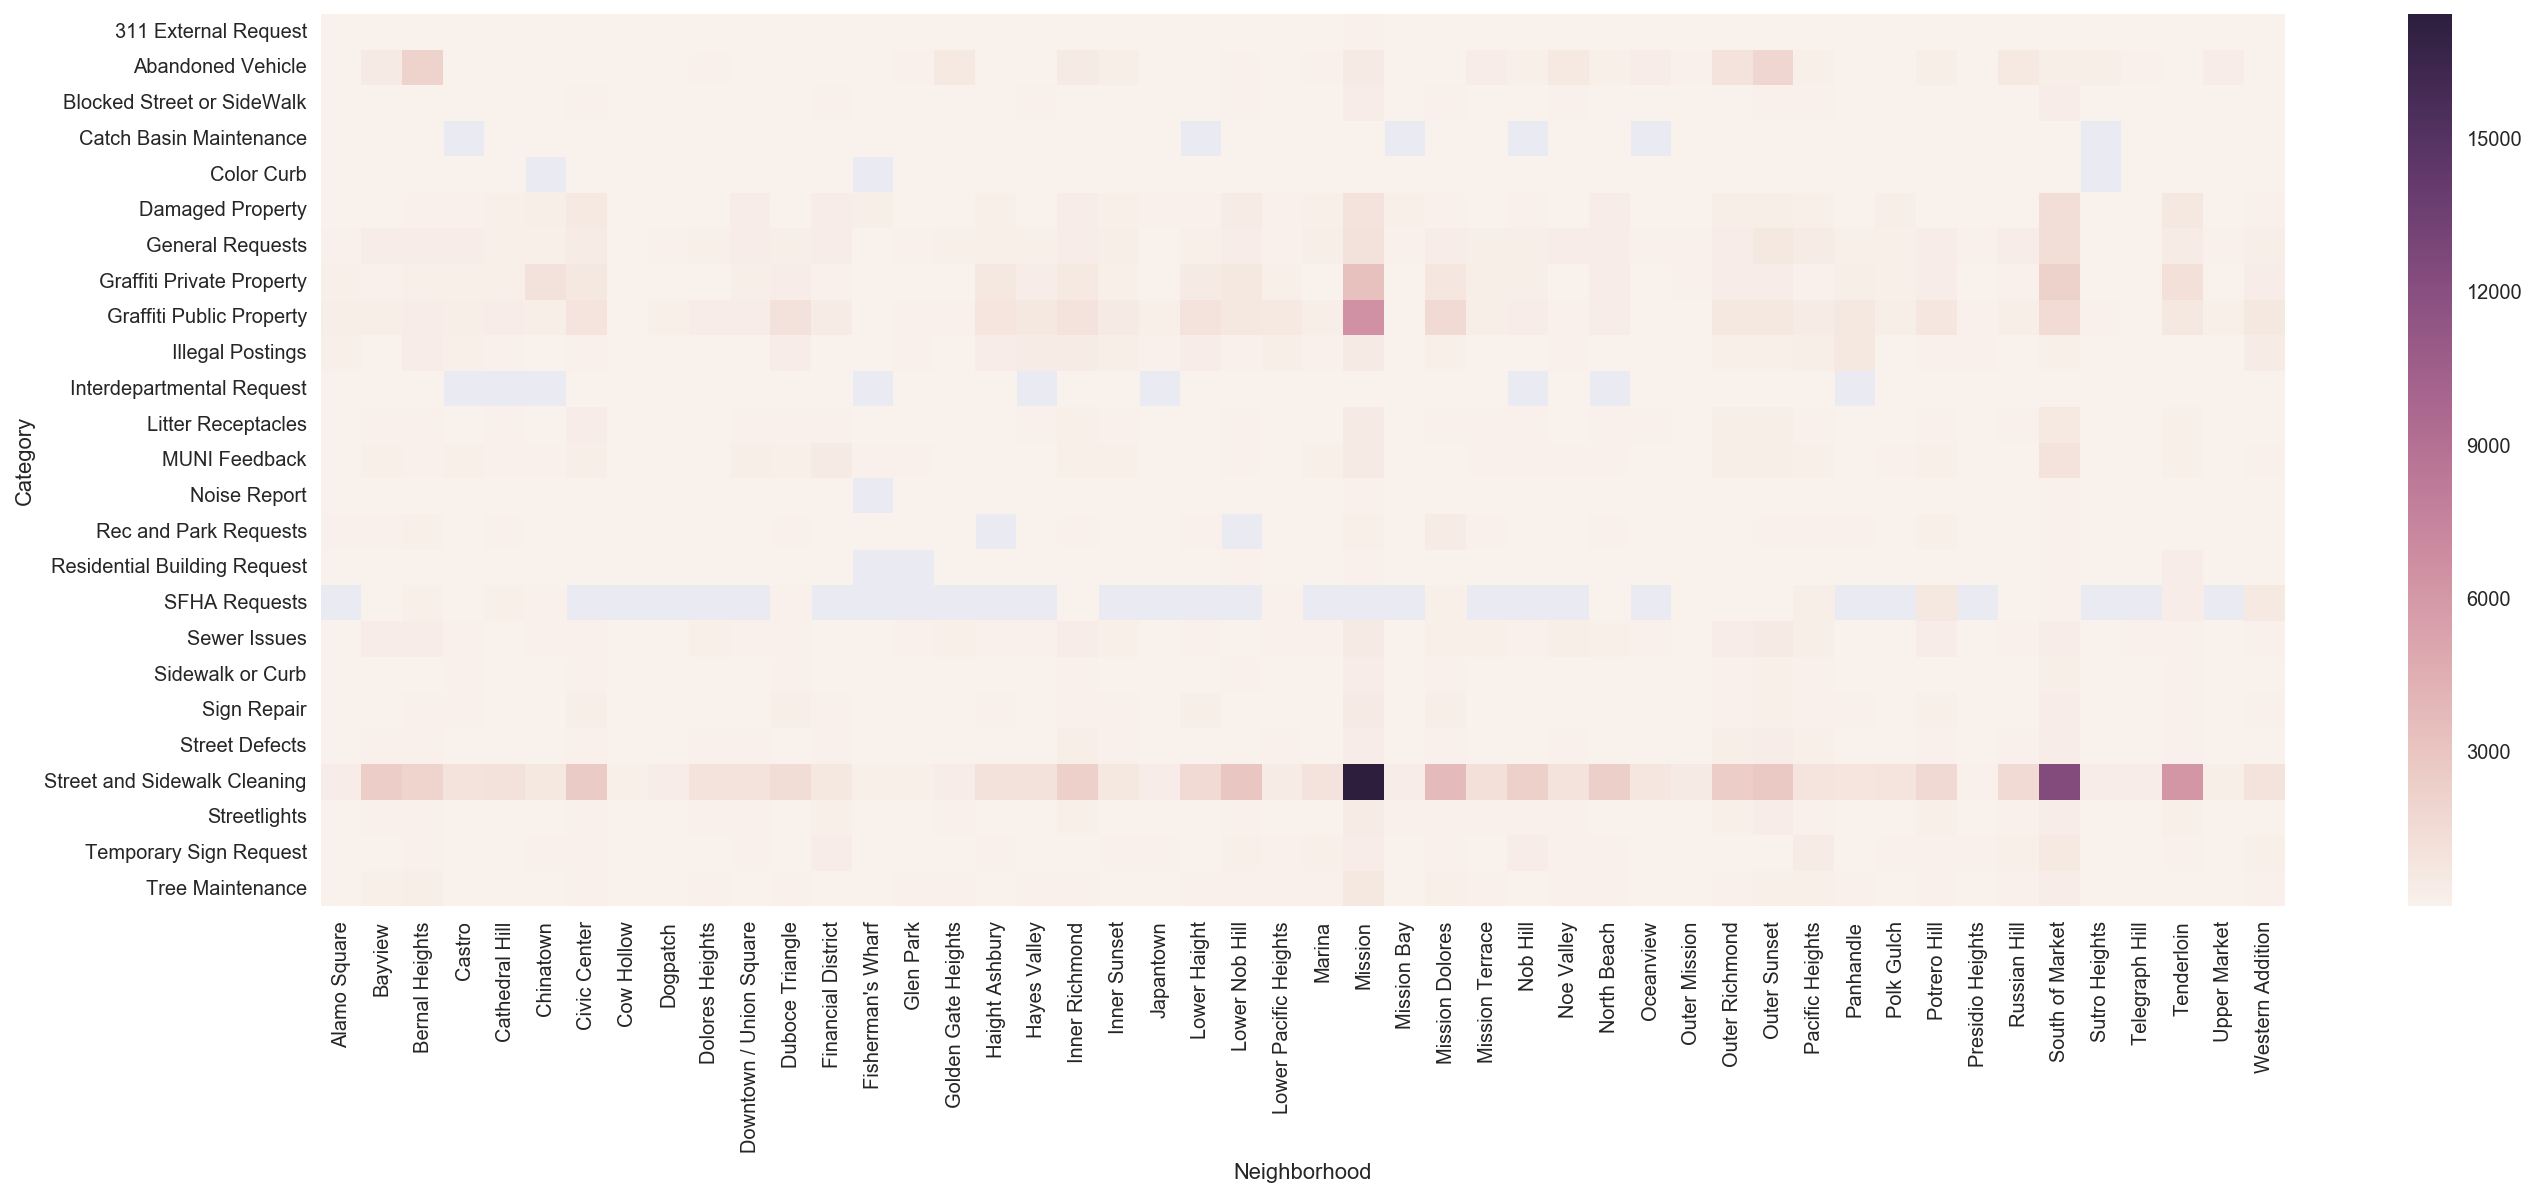

In [32]:
fig, ax = plt.subplots(figsize=(22, 8))

sns.heatmap(df_yr.groupby(by=['Category', 'Neighborhood'])['Opened'].count().unstack(), annot=False, fmt='g')

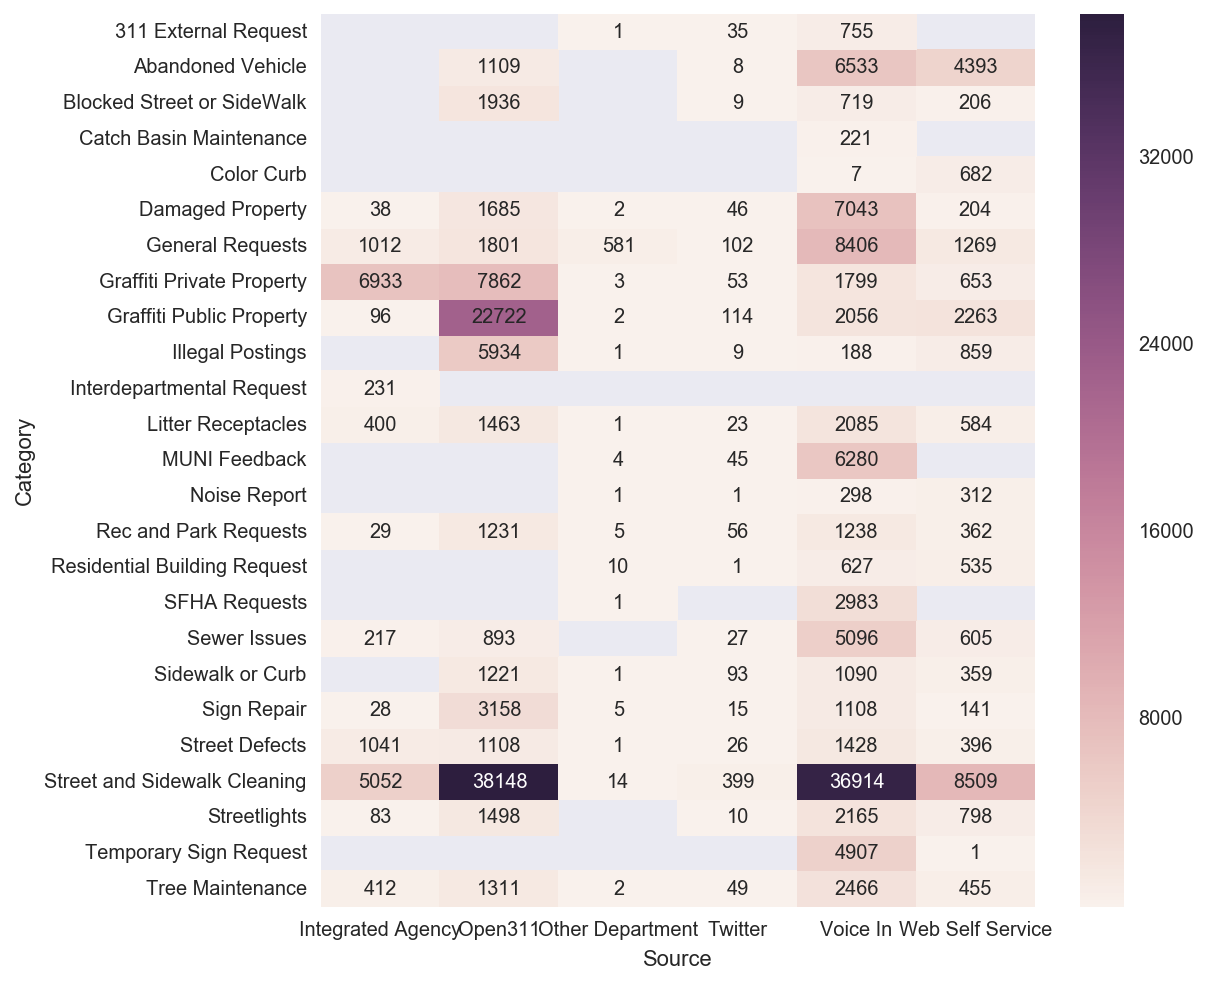

In [33]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(df_yr.groupby(by=['Category', 'Source'])['Opened'].count().unstack(), annot=True, fmt='g')

In [34]:
from scipy.stats import chi2_contingency

In [35]:
df_cat_src = df_yr.groupby(by=['Category', 'Source'])['Opened'].count().unstack().fillna(0)
chi2, p, dof, expected = chi2_contingency(df_cat_src)

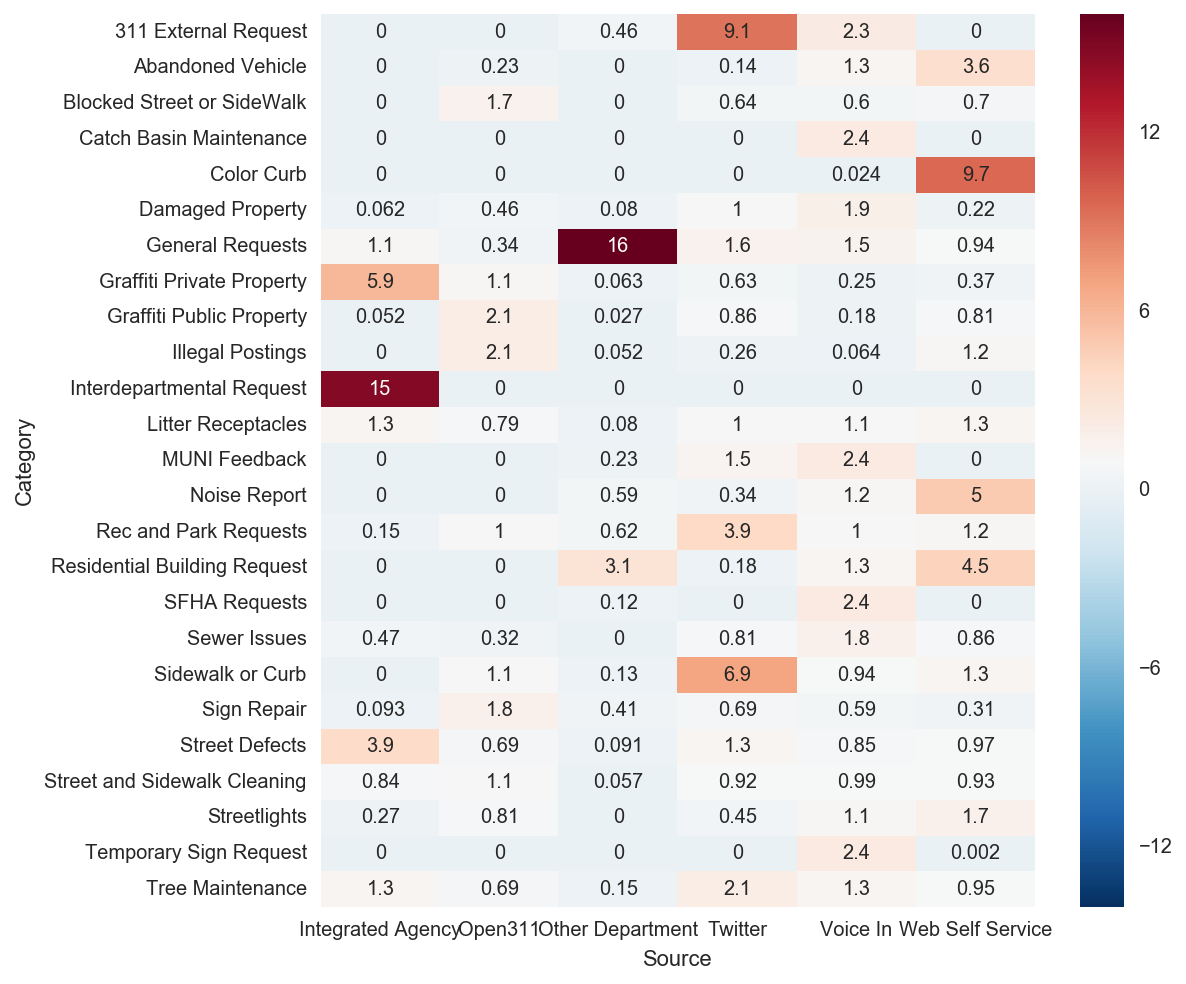

In [36]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(df_cat_src / expected, ax=ax, center=1, annot=True, vmin=0)

Resolution time

In [44]:
df_yr['Resolution_time'] = (df_yr['Closed'] - df_yr['Opened'])

/Users/mmolli/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [59]:
df_yr['Resolution_time'].head()

CaseID
5421726   3 days 15:13:40
5421718   0 days 11:39:10
5421668   0 days 09:33:31
5421666   3 days 08:25:31
5421665               NaT
Name: Resolution_time, dtype: timedelta64[ns]

In [45]:
df_yr['Resolution_time'].head()

CaseID
5421726   3 days 15:13:40
5421718   0 days 11:39:10
5421668   0 days 09:33:31
5421666   3 days 08:25:31
5421665               NaT
Name: Resolution_time, dtype: timedelta64[ns]

In [46]:
df_yr['Resolution_days'] = df_yr['Resolution_time'].astype('int') / 1000000000 / 86400
df_yr.loc[df_yr['Resolution_days'] < 0, 'Resolution_days'] = np.nan

/Users/mmolli/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/mmolli/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [47]:
df_yr['Resolution_days'].head()

CaseID
5421726    3.634491
5421718    0.485532
5421668    0.398275
5421666    3.351053
5421665         NaN
Name: Resolution_days, dtype: float64

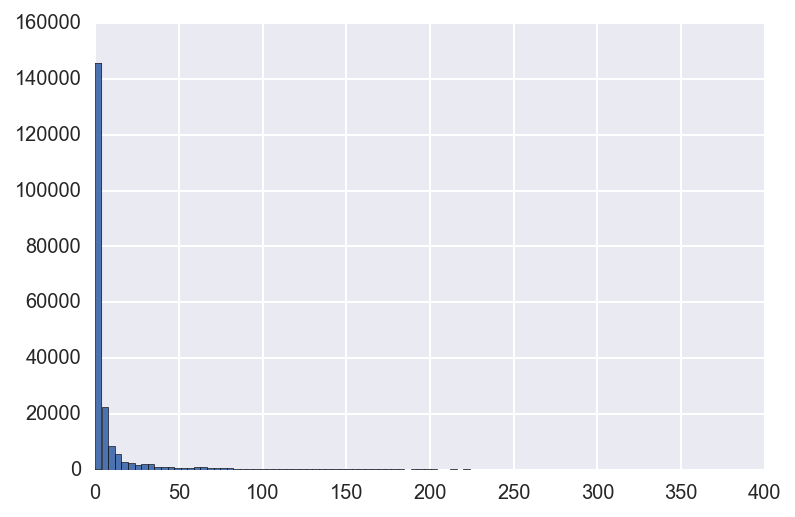

In [61]:
df_yr['Resolution_days'].hist(bins=100)

In [60]:
(df_yr['Resolution_days'] < 0).sum()

0

In [48]:
(~df_yr[df_yr['Opened'] < '2015-12-14']['Resolution_time'].isnull()).mean()

0.9060929135287179

In [50]:
df_yr.groupby(by=['Category'])['Resolution_days'].median().sort_values(ascending=False)

Category
SFHA Requests                   158.657749
Color Curb                       64.347222
Damaged Property                 27.004167
Interdepartmental Request        24.040278
Sign Repair                      16.540625
Temporary Sign Request           11.905556
Sidewalk or Curb                  6.961458
311 External Request              6.421875
Graffiti Private Property         5.844444
Illegal Postings                  5.093750
MUNI Feedback                     4.996528
Tree Maintenance                  4.844543
Abandoned Vehicle                 4.738194
Street Defects                    4.148860
Catch Basin Maintenance           2.925694
Streetlights                      2.820486
Rec and Park Requests             2.727778
Blocked Street or SideWalk        2.578472
Residential Building Request      2.088194
General Requests                  1.873611
Sewer Issues                      1.840278
Graffiti Public Property          1.720833
Litter Receptacles                1.602083
No

# Let's examine street and sidewalk cleaning

In [51]:
cat = 'Street and Sidewalk Cleaning'

df_resp = pd.DataFrame(columns=['avg_resp_days', 'opened', 'resolved'])

df_resp['avg_resp_days'] = df_yr[df_yr['Category'] == cat].groupby(by=['Neighborhood'])['Resolution_days'].mean()
df_resp['opened'] = df_yr[df_yr['Category'] == cat].groupby(by=['Neighborhood'])['Opened'].count()
df_resp['resolved'] = df_yr[df_yr['Category'] == cat].groupby(by=['Neighborhood'])['Resolution_days'].count()


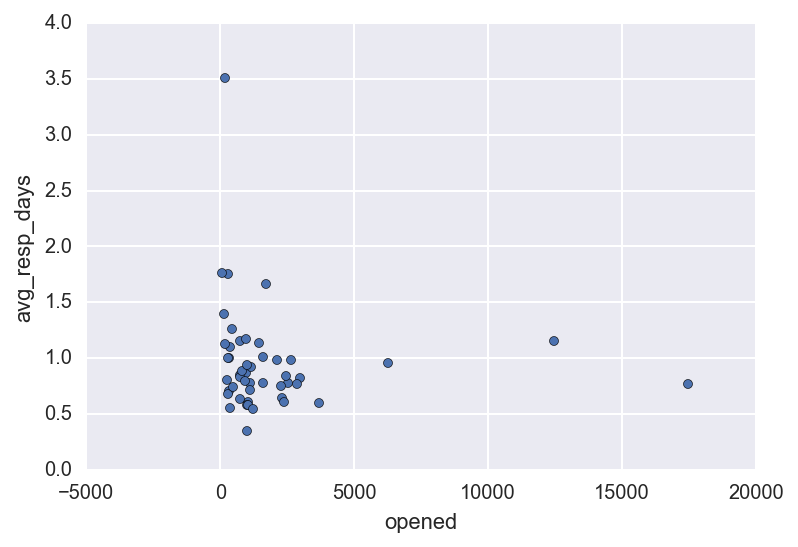

In [52]:
df_resp.plot(kind='scatter', x='opened', y='avg_resp_days')

In [65]:
df_yr['Category'].value_counts(ascending=False)

Street and Sidewalk Cleaning    89036
Graffiti Public Property        27253
Graffiti Private Property       17303
General Requests                13171
Abandoned Vehicle               12043
Damaged Property                 9018
Illegal Postings                 6991
Sewer Issues                     6838
MUNI Feedback                    6329
Temporary Sign Request           4908
Tree Maintenance                 4695
Litter Receptacles               4556
Streetlights                     4554
Sign Repair                      4455
Street Defects                   4000
SFHA Requests                    2984
Rec and Park Requests            2921
Blocked Street or SideWalk       2870
Sidewalk or Curb                 2764
Residential Building Request     1173
311 External Request              791
Color Curb                        689
Noise Report                      612
Interdepartmental Request         231
Catch Basin Maintenance           221
Name: Category, dtype: int64

In [64]:
df_yr['Neighborhood'].value_counts(ascending=False)

Mission                    35525
South of Market            24420
Tenderloin                 11260
Outer Sunset                9536
Mission Dolores             8704
Bernal Heights              7453
Inner Richmond              7306
Civic Center                7071
Outer Richmond              6984
Lower Nob Hill              6529
Potrero Hill                5849
Bayview                     4976
Duboce Triangle             4942
Lower Haight                4764
North Beach                 4728
Nob Hill                    4713
Pacific Heights             4507
Western Addition            4372
Haight Ashbury              4034
Russian Hill                3963
Financial District          3596
Hayes Valley                3427
Panhandle                   3394
Noe Valley                  3359
Chinatown                   3266
Mission Terrace             3218
Inner Sunset                3193
Downtown / Union Square     3102
Marina                      2926
Cathedral Hill              2793
Castro    

In [167]:
df_yr.groupby(by=['Category', 'Neighborhood'])['Resolution_days'].mean().unstack()

Neighborhood,Alamo Square,Bayview,Bernal Heights,Castro,Cathedral Hill,Chinatown,Civic Center,Cow Hollow,Dogpatch,Dolores Heights,Downtown / Union Square,Duboce Triangle,Financial District,Fisherman's Wharf,Glen Park,Golden Gate Heights,Golden Gate Park,Haight Ashbury,Hayes Valley,Inner Richmond,Inner Sunset,Japantown,Lower Haight,Lower Nob Hill,Lower Pacific Heights,Marina,Mission,Mission Bay,Mission Dolores,Mission Terrace,Nob Hill,Noe Valley,North Beach,Oceanview,Outer Mission,Outer Richmond,Outer Sunset,Pacific Heights,Panhandle,Polk Gulch,Potrero Hill,Presidio Heights,Russian Hill,South of Market,Sutro Heights,Telegraph Hill,Tenderloin,Upper Market,Western Addition
Category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
311 External Request,38.831250,0.839236,21.646843,33.630972,5.767854,39.011651,9.941700,98.559028,44.084722,3.039236,28.415731,36.634549,19.690398,3.388889,19.353611,11.807292,1.952268,10.915953,27.077344,20.710278,28.250298,27.803646,4.927992,33.887797,26.174702,34.520139,26.144474,3.949769,25.750884,22.325661,19.975694,28.700694,6.368596,17.163542,10.956944,33.821488,11.673037,20.067072,14.934221,23.478770,13.832324,15.006944,18.476004,27.594161,6.834091,84.519444,23.626136,34.392859,16.944502
Abandoned Vehicle,3.497025,4.775669,4.931838,4.043169,4.545964,4.843022,3.595228,4.653317,4.645360,4.368789,4.291667,4.011497,4.907786,4.749884,5.991214,4.732101,4.181131,3.744599,4.457268,4.761682,4.479057,4.123720,4.388117,5.498797,4.590974,5.110444,4.700498,4.845655,4.775188,4.795111,5.318562,5.110337,4.515120,4.973402,5.725599,4.358852,4.688659,5.279243,4.472220,4.662036,4.592521,4.254411,5.243218,4.363589,4.467887,5.993403,4.597800,4.763510,4.319809
Blocked Street or SideWalk,2.351273,2.687600,6.990140,4.150935,5.091222,10.093102,7.910348,4.654960,8.243475,3.957743,7.596270,5.742785,7.328087,5.114167,7.722708,1.759145,2.236354,7.592861,8.674546,5.653141,6.510848,3.835532,2.796327,7.255261,4.793711,4.558603,3.880946,2.076027,5.955440,3.258887,11.300989,3.980080,7.615909,8.181424,1.391150,5.866310,4.112847,6.099537,6.019686,4.582338,9.928608,6.433611,13.759048,3.285729,2.031481,5.508657,3.389210,5.240046,7.787479
Catch Basin Maintenance,0.795324,28.121176,13.246130,NaN,13.088889,38.696721,1.831493,0.077083,2.939583,8.239931,34.847222,11.459398,17.808912,3.828472,43.905172,33.468715,NaN,22.407465,39.883333,1.787189,6.966613,2.274074,NaN,6.851914,1.105810,8.984525,22.532891,NaN,6.554184,0.560193,NaN,5.573476,6.483507,NaN,76.462847,9.569442,8.614997,25.366316,72.253715,33.882639,59.490615,15.524479,12.890938,33.139979,NaN,4.905903,25.323593,0.172025,0.887674
Color Curb,64.189931,65.021402,72.532191,63.501992,73.405394,NaN,49.507284,77.498965,64.171007,66.852164,63.343403,65.021468,62.001636,NaN,75.745498,74.313194,NaN,71.851405,53.899045,61.201413,72.273241,71.572024,76.750063,65.813294,65.574913,68.692327,69.477291,63.808750,65.838038,62.954620,57.860058,67.151374,79.931820,64.779995,80.868056,72.159855,64.570144,69.869174,78.043198,63.528521,61.053203,71.647042,64.517222,56.080752,NaN,63.681854,58.067977,67.532954,67.286654
Damaged Property,15.161828,5.134643,24.566177,19.393503,47.537355,71.599694,32.227784,53.589875,8.768185,15.933153,36.397946,17.027269,43.560341,64.067591,26.132601,2.185251,14.806589,73.832256,50.837640,55.304452,56.284271,57.760793,22.788328,56.986016,50.211324,70.413923,43.569842,47.644239,29.097920,32.676720,28.794511,49.910961,69.923719,1.150483,5.185473,49.979092,54.073844,41.341405,24.193954,50.637051,6.046685,87.554560,45.596235,47.816840,6.821942,31.207507,50.288961,1.685427,29.980808
General Requests,6.911362,11.656969,9.257461,5.631348,6.427884,10.841975,10.442947,6.221366,7.505875,9.523771,12.819113,7.249825,12.421860,10.557166,9.774446,12.152122,13.355909,6.150688,11.712075,9.996169,8.249613,15.670141,9.329846,9.849531,10.316775,12.184572,9.999524,13.160211,8.018964,10.921465,8.780197,8.132563,10.130436,8.222689,12.815019,9.214206,10.420441,8.348336,15.183047,7.170303,9.439299,8

In [91]:
c_ix = df_yr['Category'].value_counts(ascending=False).index
n_ix = df_yr['Neighborhood'].value_counts(ascending=False).index
rd_ix = df_yr['Request Details'].value_counts(ascending=False).index

In [119]:
sns.heatmap?

/Users/mmolli/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


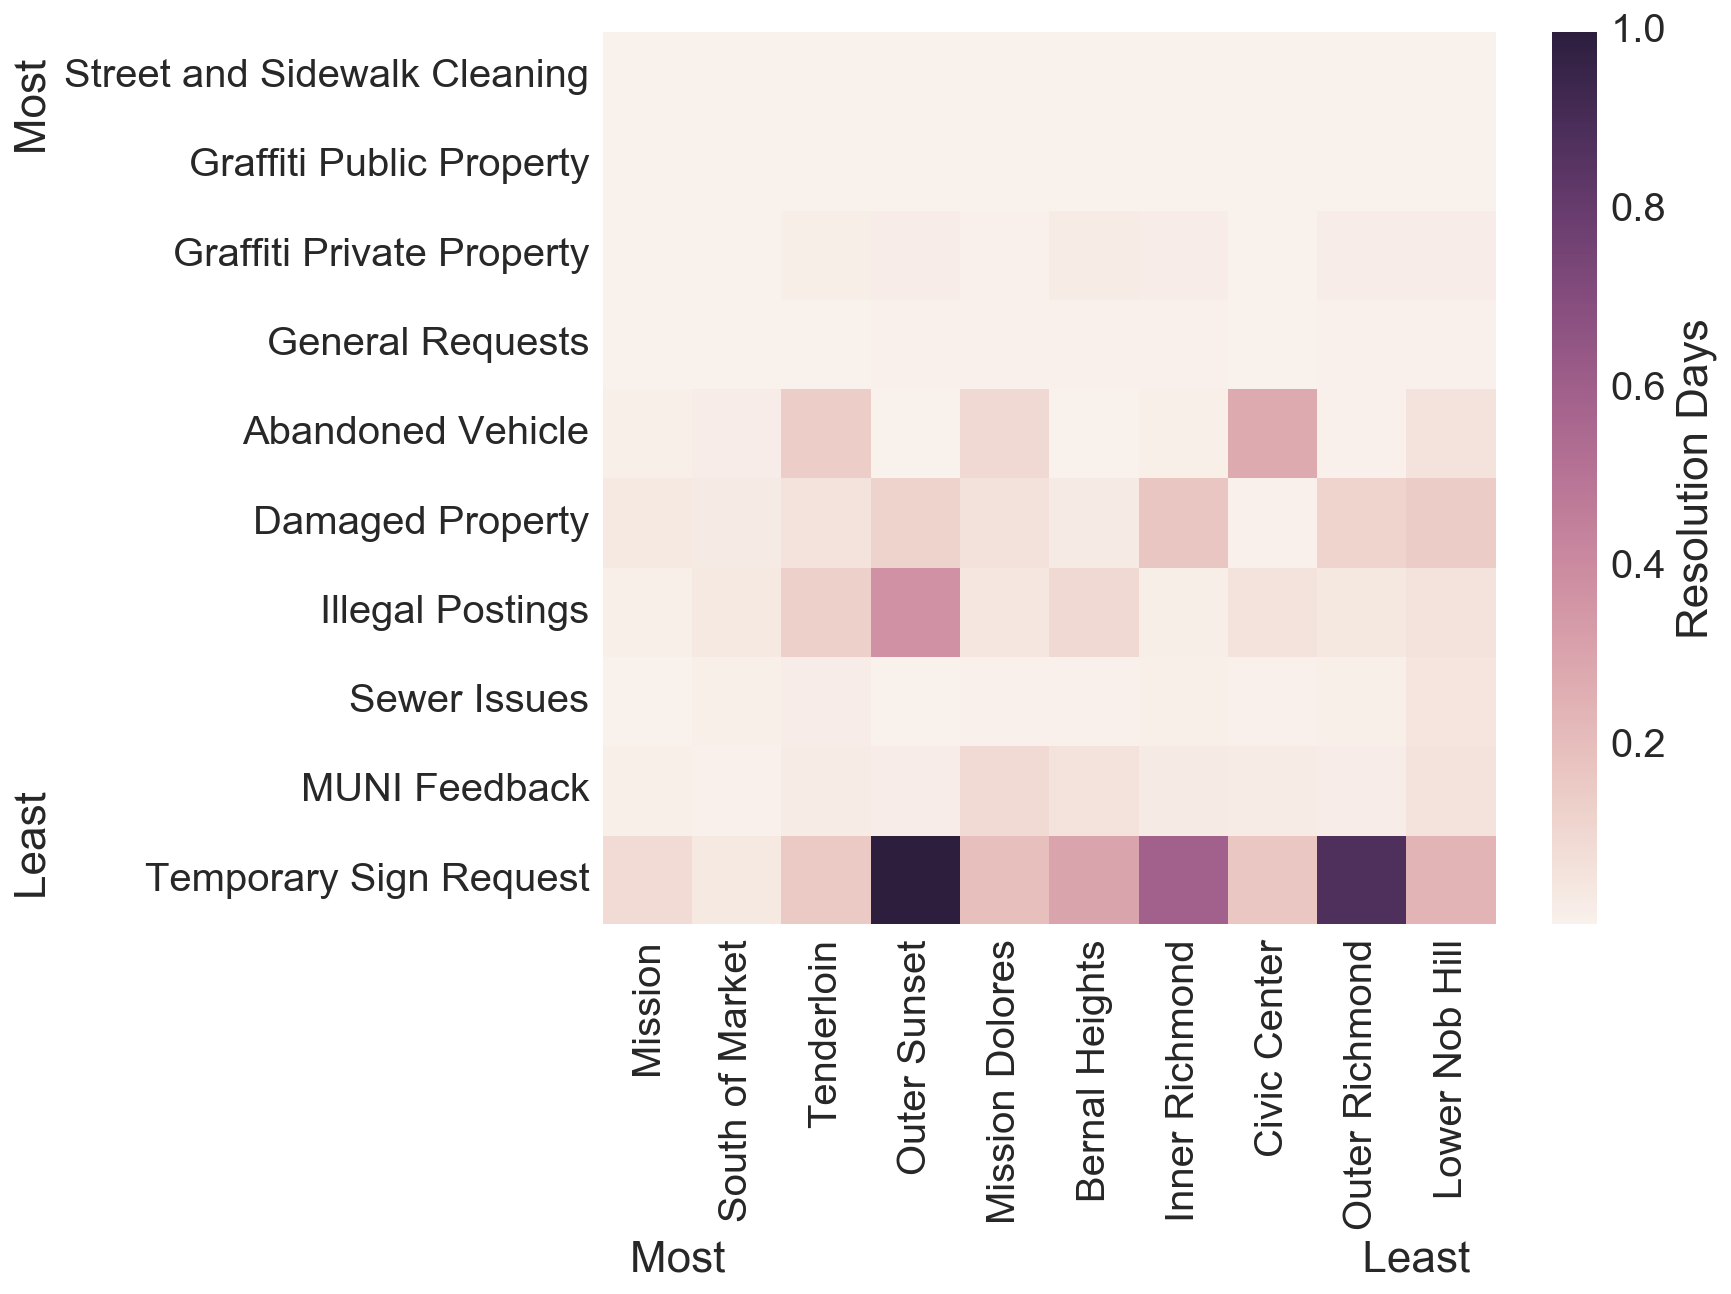

In [130]:
sns.set(font_scale=2)
req_count = df_yr.groupby(by=['Category', 'Neighborhood'])['Resolution_days'].count().unstack()

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(df_yr.groupby(by=['Category', 'Neighborhood'])['Resolution_days'].median().unstack().divide(req_count).ix[c_ix][n_ix].iloc[:10, :10]
            , ax=ax
            , vmax=1
            , cbar_kws={'label': 'Resolution Days'}
           )

ax.set_xlabel('Most                                                    Least')
ax.set_ylabel('Least                                                    Most')

# cbar = ax.figure.colorbar(ax.collections[0])
# cbar.set_label('Resolution days')

In [117]:
cbar = ax.figure.colorbar(ax.collections[0])

['__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

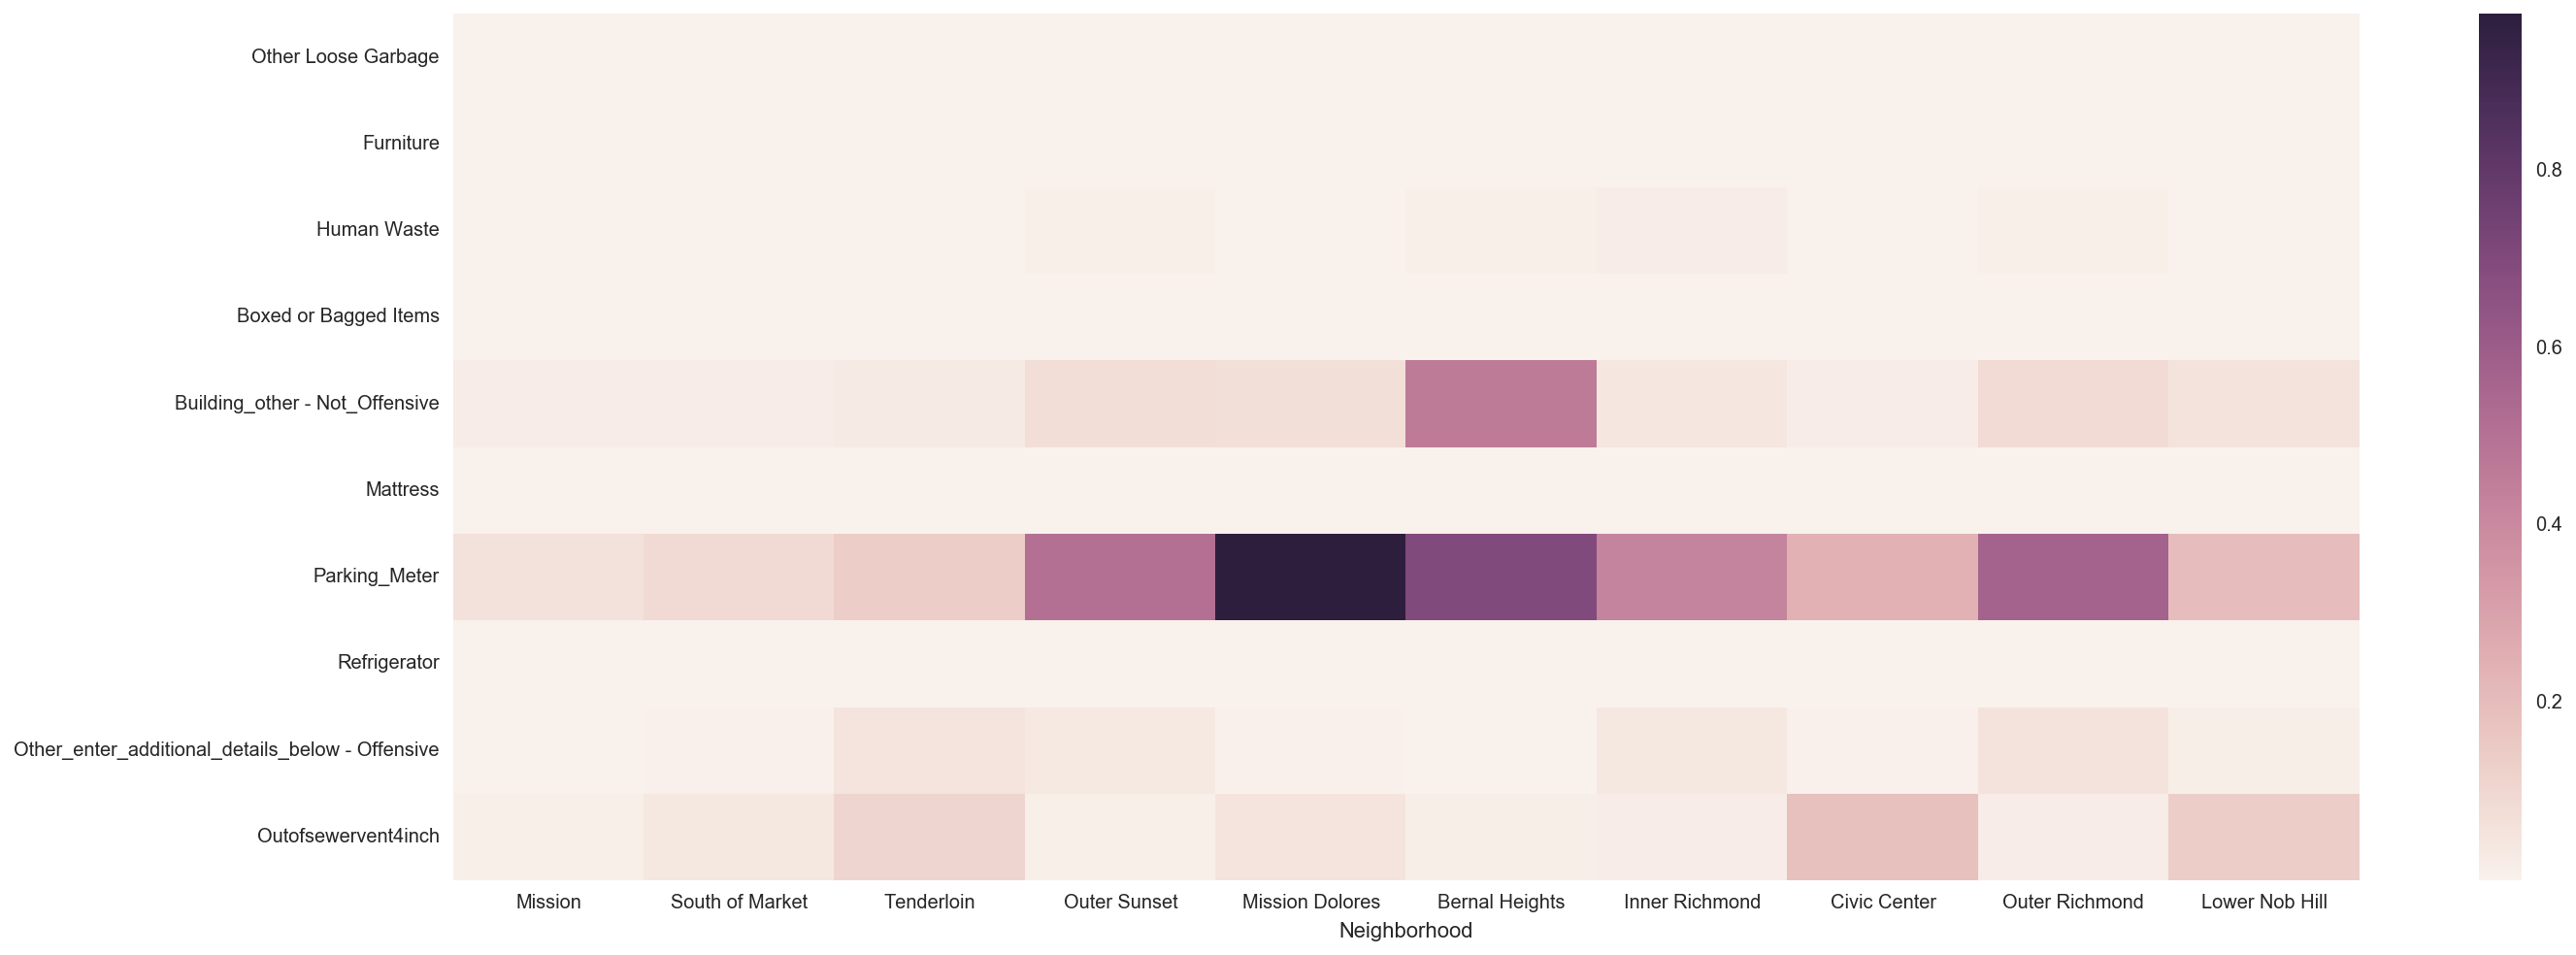

In [101]:
req_count = df_yr.groupby(by=['Request Details', 'Neighborhood'])['Resolution_days'].count().unstack()

fig, ax = plt.subplots(figsize=(22, 8))

sns.heatmap(df_yr.groupby(by=['Request Details', 'Neighborhood'])['Resolution_days'].median().unstack().divide(req_count).ix[rd_ix[:20]][n_ix].iloc[:10,:10]
            , ax=ax
            #, vmax=30
           )

In [90]:
df['Request Details'].value_counts().sort_values(ascending=False).head(100)

Other Loose Garbage                                                109288
Furniture                                                           81515
Garbage                                                             64893
Mattress                                                            50740
Parking_Meter                                                       49640
Pole - Offensive                                                    34180
Human Waste                                                         33284
Building_other - Not_Offensive                                      33057
Pavement_Defect                                                     29604
Building_commercial - Not_Offensive                                 29537
Plumbers                                                            28664
Outofsewervent4inch                                                 28504
Human_waste_or_urine                                                23474
Sidewalk_Cleaning                     

In [87]:
df[df['Category'] == 'SFHA Requests'].head()

,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL,Opened_ymd
CaseID,,,,,,,,,,,,,,,,
5553343,2016-02-09 23:14:34,NaT,2016-02-09 23:18:25,Open,Open,Housing Authority SR Queue,SFHA Requests,SFHA Priority - Emergency,Plumbers,"711 PACIFIC AVE, Apt 312, SAN FRANCISCO, CA, 9...",3,Chinatown,"(37.796705726767, -122.407614465052)",Voice In,NaN,2016-02-09
5553304,2016-02-09 22:34:23,NaT,2016-02-09 22:39:15,Open,Open,Housing Authority SR Queue,SFHA Requests,SFHA Priority - Emergency,Plumbers,"65 BLYTHDALE AVE, SAN FRANCISCO, CA, 94134",10,Sunnydale,"(37.71061880297, -122.418021730547)",Voice In,NaN,2016-02-09
5553009,2016-02-09 18:44:46,NaT,2016-02-09 18:48:25,Open,Open,Housing Authority SR Queue,SFHA Requests,SFHA Priority - Routine,Plumbers,"113 DAKOTA ST, SAN FRANCISCO, CA, 94107",10,Potrero Hill,"(37.753808892835, -122.39565377577)",Voice In,NaN,2016-02-09
5552788,2016-02-09 17:17:10,NaT,2016-02-09 17:25:39,Open,Open,Housing Authority SR Queue,SFHA Requests,SFHA Priority - Emergency,Carpenters,"123 SANTOS ST, SAN FRANCISCO, CA, 94134",10,Sunnydale,"(37.710511669565, -122.418840245691)",Voice In,NaN,2016-02-09
5552676,2016-02-09 16:46:59,NaT,2016-02-09 16:55:17,Open,Open,Housing Authority SR Queue,SFHA Requests,SFHA Priority - Emergency,Carpenters,"320 CLEMENTINA ST, Apt 1214, SAN FRANCISCO, CA...",6,South of Market,"(37.781928274141, -122.402470944649)",Voice In,NaN,2016-02-09


In [89]:
df[df['Category'] == 'SFHA Requests']['Request Details'].value_counts().sort_values(ascending=False)

Plumbers         28664
Carpenters       13012
Electricians     10871
Steam Fitters     3295
Glaziers          2728
Laborers          2489
Custodian          605
Tile Layers        333
Painters           202
Name: Request Details, dtype: int64